# Resume Analyzer

#### Context: A collection of Resume Examples taken from livecareer.com for categorizing a given resume into any of the labels defined in the dataset.

#### Content: Contains 2400+ Resumes in string as well as PDF format.

### Step 1: Loading and Organize the Data

In [1]:
import os

# Path to the main data directory
data_dir = "data"

# Initialize lists to store file paths and labels
file_paths = []
categories = []

# Walk through each subdirectory (category)
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        for file_name in os.listdir(category_path):
            if file_name.endswith(".pdf"):
                file_paths.append(os.path.join(category_path, file_name))
                categories.append(category)

# Create a DataFrame for better organization
import pandas as pd

data = pd.DataFrame({
    "File_Path": file_paths,
    "Category": categories
})
print(data.head())

                      File_Path    Category
0  data\ACCOUNTANT\10554236.pdf  ACCOUNTANT
1  data\ACCOUNTANT\10674770.pdf  ACCOUNTANT
2  data\ACCOUNTANT\11163645.pdf  ACCOUNTANT
3  data\ACCOUNTANT\11759079.pdf  ACCOUNTANT
4  data\ACCOUNTANT\12065211.pdf  ACCOUNTANT


### Step 2: Extract Text from PDF Files

In [2]:
from PyPDF2 import PdfReader

# Function to extract text from a single PDF
def extract_text_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        return text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return ""

# Apply the function to all file paths
data["Resume_Text"] = data["File_Path"].apply(extract_text_from_pdf)
print(data.head())


                      File_Path    Category  \
0  data\ACCOUNTANT\10554236.pdf  ACCOUNTANT   
1  data\ACCOUNTANT\10674770.pdf  ACCOUNTANT   
2  data\ACCOUNTANT\11163645.pdf  ACCOUNTANT   
3  data\ACCOUNTANT\11759079.pdf  ACCOUNTANT   
4  data\ACCOUNTANT\12065211.pdf  ACCOUNTANT   

                                         Resume_Text  
0  ACCOUNTANT\nSummary\nFinancial Accountant spec...  
1  STAFF ACCOUNTANT\nSummary\nHighly analytical a...  
2  ACCOUNTANT\nProfessional Summary\nTo obtain a ...  
3  SENIOR ACCOUNTANT\nExperience\nCompany Name\n ...  
4  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...  


### Step 3: Preprocess the Extracted Text

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = text.lower()                  # Convert to lowercase
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
data["Cleaned_Text"] = data["Resume_Text"].apply(preprocess_text)
print(data.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erdha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erdha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                      File_Path    Category  \
0  data\ACCOUNTANT\10554236.pdf  ACCOUNTANT   
1  data\ACCOUNTANT\10674770.pdf  ACCOUNTANT   
2  data\ACCOUNTANT\11163645.pdf  ACCOUNTANT   
3  data\ACCOUNTANT\11759079.pdf  ACCOUNTANT   
4  data\ACCOUNTANT\12065211.pdf  ACCOUNTANT   

                                         Resume_Text  \
0  ACCOUNTANT\nSummary\nFinancial Accountant spec...   
1  STAFF ACCOUNTANT\nSummary\nHighly analytical a...   
2  ACCOUNTANT\nProfessional Summary\nTo obtain a ...   
3  SENIOR ACCOUNTANT\nExperience\nCompany Name\n ...   
4  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...   

                                        Cleaned_Text  
0  accountant summary financial accountant specia...  
1  staff accountant summary highly analytical det...  
2  accountant professional summary obtain positio...  
3  senior accountant experience company name june...  
4  senior accountant professional summary senior ...  


### Step 4: Feature Extraction

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X = tfidf.fit_transform(data["Cleaned_Text"]).toarray()

# Encode the labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["Category"])
print("Feature matrix shape:", X.shape)
print("Categories:", label_encoder.classes_)

Feature matrix shape: (2484, 5000)
Categories: ['ACCOUNTANT' 'ADVOCATE' 'AGRICULTURE' 'APPAREL' 'ARTS' 'AUTOMOBILE'
 'AVIATION' 'BANKING' 'BPO' 'BUSINESS-DEVELOPMENT' 'CHEF' 'CONSTRUCTION'
 'CONSULTANT' 'DESIGNER' 'DIGITAL-MEDIA' 'ENGINEERING' 'FINANCE' 'FITNESS'
 'HEALTHCARE' 'HR' 'INFORMATION-TECHNOLOGY' 'PUBLIC-RELATIONS' 'SALES'
 'TEACHER']


### Step 5: Split the Data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Train a Model

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Step 7: Evaluate the Model

Model Accuracy: 0.71
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.61      1.00      0.76        19
              ADVOCATE       0.61      0.61      0.61        23
           AGRICULTURE       0.83      0.31      0.45        16
               APPAREL       0.70      0.54      0.61        13
                  ARTS       0.57      0.12      0.20        33
            AUTOMOBILE       1.00      0.11      0.20         9
              AVIATION       0.70      0.81      0.75        26
               BANKING       0.56      0.53      0.55        17
                   BPO       0.00      0.00      0.00         5
  BUSINESS-DEVELOPMENT       0.73      0.95      0.83        20
                  CHEF       0.79      0.88      0.83        17
          CONSTRUCTION       0.86      0.89      0.88        28
            CONSULTANT       0.61      0.55      0.58        20
              DESIGNER       1.00      0.92      0.96      

d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


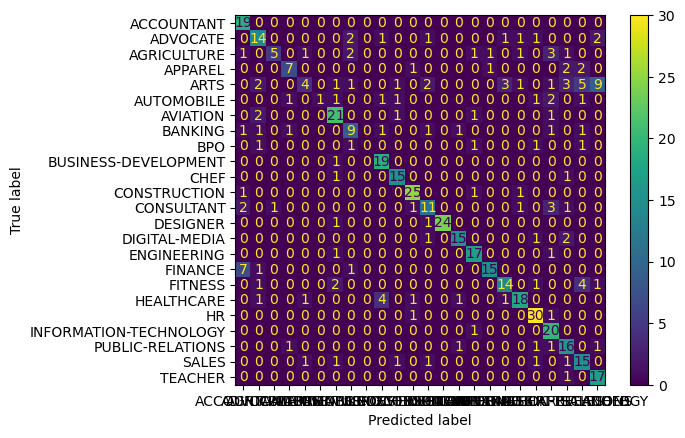

In [7]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=label_encoder.classes_)


### Step 8: Save the Model

In [8]:
import joblib

joblib.dump(rf_model, "resume_classifier_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")


['label_encoder.pkl']

### Step 9 To make model to evaluate a resume PDF

1] Extract Text from uploading PDF


In [9]:
import pdfplumber

def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ""
        for page in pdf.pages:
            text += page.extract_text()
    return text


2] Preprocess the Extracted Text

In [10]:
# Assuming `preprocess_text` is defined as part of preprocessing
def preprocess_and_transform(text, tfidf):
    cleaned_text = preprocess_text(text)
    return tfidf.transform([cleaned_text]).toarray()


3] Predict Category and Assign Score

In [11]:
def predict_resume_category(pdf_path, model, tfidf, label_encoder):
    # Extract text from PDF
    resume_text = extract_text_from_pdf(pdf_path)
    
    # Preprocess and transform the text
    features = preprocess_and_transform(resume_text, tfidf)
    
    # Predict category
    predicted_category = label_encoder.inverse_transform(model.predict(features))[0]
    
    # Get probability scores
    probabilities = model.predict_proba(features)
    score = max(probabilities[0]) * 100  # Confidence score in percentage
    
    return predicted_category, score


4] Create a Script to Evaluate PDF

In [12]:
# Example usage
pdf_path = "Sample resume.pdf"  

predicted_category, score = predict_resume_category(pdf_path, rf_model, tfidf, label_encoder)

print(f"Predicted Category: {predicted_category}")
print(f"Confidence Score: {score:.2f}%")


Predicted Category: ENGINEERING
Confidence Score: 43.00%


In [13]:
import streamlit as st

# Streamlit interface
st.title("AI-Powered Resume Analyzer")
uploaded_file = st.file_uploader("Upload a Resume (PDF format)", type=["pdf"])

if uploaded_file is not None:
    with open("uploaded_resume.pdf", "wb") as f:
        f.write(uploaded_file.getbuffer())
    
    st.write("Processing your resume...")
    category, confidence = predict_resume_category("uploaded_resume.pdf", rf_model, tfidf, label_encoder)
    
    st.success(f"Predicted Category: {category}")
    st.info(f"Confidence Score: {confidence:.2f}%")


2024-12-28 22:11:26.315 
  command:

    streamlit run C:\Users\erdha\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
